# Ethiopia Mapping Section

This Python Jupyter file is to calculate and build out the requirements for the Ethiopian design. It could be possible to do this in Excel as well; but this way we have an ability to reference and redesign as per the changing requirements.

First Step is to collect the information; I have a Github account under my username (johnmeye) which i will reference from the file so that anyone who uses Conda/Jupyter will be able to get the files. For any challenges reach out to me on teams or by email (johnmeye@cisco.com)

In [1]:
from urllib.request import urlopen
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#For the Map Plotting
import plotly
import plotly.express as px

#For the Inline display of figures.
from IPython.display import HTML
from IPython.display import IFrame

#For the Widgets
import ipywidgets as widgets #Importing Widgets to allow for the changing of variables on the fly as questions are asked.

## Geographical Data

This file below is from the Ethiopian files available from the database on the following site:
https://data.humdata.org/dataset/ethiopia-population-data-_-admin-level-0-3

This site has both topography and the Level 0-3 admin data on the population levels per county/province. Vodacom only provided at Admin 1 (Provincial level) for this RFQ; but we are able to go more in depth to try and work out if there is any additional information we can use to strengthen our position.

The following section will pull that information from my Github; so that you don't have to fetch it yourself. Then load it as a JSON file into the DB, which you can see are Polygon type files with GPS coordinates which mark out the different layers/levels in the country. 

If needed you can pull the information from the GeoJSON files as well, but i did include the boundaries data as a dataframe too. 
Example: counties3["features"][0]['properties'] #Just a sample on how to pull out specific information from the Counties json Files.

In [2]:
#Pull the Data I stored in my Github account for the analysis.

with urlopen('https://github.com/johnmeye/Ethiopia/raw/master/Ethiopia_JSON/eth_admbnda_adm1_csa_bofed_20190827.json') as response:
    counties1 = json.load(response)
    
with urlopen('https://github.com/johnmeye/Ethiopia/raw/master/Ethiopia_JSON/eth_admbnda_adm2_csa_bofed_20190827.json') as response:
    counties2 = json.load(response)
    
with urlopen('https://github.com/johnmeye/Ethiopia/raw/master/Ethiopia_JSON/eth_admbnda_adm3_csa_bofed_20190827.json') as response:
    counties3 = json.load(response)

#Feature Data is available in the JSON files but its easier to manage from a tableset so i have pulled this below as well.
    
Boundaries_Data1 = pd.read_excel("https://github.com/johnmeye/Ethiopia/raw/master/eth_adminboundaries_tabulardata.xlsx",
                  sheet_name='Admin1')

Boundaries_Data2 = pd.read_excel("https://github.com/johnmeye/Ethiopia/raw/master/eth_adminboundaries_tabulardata.xlsx",
                    sheet_name='Admin2')

Boundaries_Data3 = pd.read_excel("https://github.com/johnmeye/Ethiopia/raw/master/eth_adminboundaries_tabulardata.xlsx",
                    sheet_name='Admin3')


## Admin Level Data

As mentioned above; there is both Geo and Admin data; this information matches the information against some paramater; since the file is nicely structured according to standards we will stick to the humanitarian markings. 

Below i read the information from different levels into the variables for Admin1-3 so that we are able to use them to draw choropleth maps of the country. 

Once read into memory; it is possible to find matches against the specific parameters in both the GeoJSON and the Admin files. So i run a few sample commands to view what the data looks like. 



In [3]:
Admin1 = pd.read_excel("https://github.com/johnmeye/Ethiopia/raw/master/ethiopia-population-data-_-admin-level-0-3.xlsx",
                   dtype={"admin1Pcode": str},
                   skiprows=[1],
                   sheet_name='Admin1')

Admin2 = pd.read_excel("https://github.com/johnmeye/Ethiopia/raw/master/ethiopia-population-data-_-admin-level-0-3.xlsx",
                   dtype={"admin1Pcode": str},
                   skiprows=[1],
                   sheet_name='Admin2')

Admin3 = pd.read_excel("https://github.com/johnmeye/Ethiopia/raw/master/ethiopia-population-data-_-admin-level-0-3.xlsx",
                   dtype={"admin1Pcode": str},
                   skiprows=[1],
                   sheet_name='Admin3')

In [4]:
Admin3.groupby(['admin1Name_en','admin3Name_en']).sum()

Total Population           Male  \
admin1Name_en admin3Name_en                                       
Addis Ababa   Addis Ketema         327842.348838  159261.974462   
              Akaki - Kalit        234809.000000  114142.546130   
              Arada                271593.917924  126449.365425   
              Bole                 416719.000000  194486.438172   
              Gulele               343597.686758  164998.265494   
...                                          ...            ...   
Tigray        Tsegede (Tigray)     121671.450085   61613.748036   
              Tselemti             167064.639579   83791.034924   
              Welkait              161891.656009   81770.451661   
              Werei Leke           173154.626295   84567.915926   
              Wukro Town            50733.903599   24637.550629   

                                       Female  Children (under 18 years)  \
admin1Name_en admin3Name_en                                                
Addis Ababa   Addis Ketema      168580.374375              173756.444884   
              Akaki - Kalit     120666.453870              124448.770000   
              Arada             145144.552499              143944.776500   
              Bole              222232.561828              220861.070000   
              Gulele            178599.421264              182106.773982   
...                                       ...                        ...   
Tigray        Tsegede (Tigray)   60057.702048               64485.868545   
              Tselemti           83273.604655               88544.258977   
              Welkait            80121.204348               85802.577685   
              Werei Leke         88586.710369               91771.951936   
              Wukro Town         26096.352969               26888.968907   

                                Adult (18 - 60 years)  \
admin1Name_en admin3Name_en                             
Addis Ababa   Addis Ketema              138185.550035   
              Akaki - Kalit              98971.993500   
              Arada                     114476.836405   
              Bole                      175647.058500   
              Gulele                    144826.424969   
...                                               ...   
Tigray        Tsegede (Tigray)           51284.516211   
              Tselemti                   70417.745582   
              Welkait                    68237.333008   
              Werei Leke                 72984.674983   
              Wukro Town                 21384.340367   

                                Elderly (Above 60 years)  
admin1Name_en admin3Name_en                               
Addis Ababa   Addis Ketema                  15900.353919  
              Akaki - Kalit                 11388.236500  
              Arada                         13172.305019  
              Bole                          20210.871500  
              Gulele                        16664.487808  
...                                                  ...  
Tigray        Tsegede (Tigray)               5901.065329  
              Tselemti                       8102.635020  
              Welkait                        7851.745316  
              Werei Leke                     8397.999375  
              Wukro Town                     2460.594325  

[983 rows x 6 columns]

# Plotting the information on a Choropleth map

This information that we have gathered above needs to be represented in order to accurately help. 

Vodacom has provided Admin 1 information so we will plot against the Admin1 codes in the information. 

I have made it all at different levels so that some code can run quicker if need be.

In [5]:
fig = px.choropleth_mapbox(Admin1, 
                           geojson=counties1, 
                           locations='admin1Pcode', featureidkey="properties.ADM1_PCODE",
                           color='Total Population',
                           color_continuous_scale="portland",
                           range_color=(500000, 30000000),
                           mapbox_style="carto-positron",
                           zoom=5, center = {"lat": 9, "lon": 39},
                           opacity=0.5,
                           hover_name='admin1Name_en',
                           labels={
                            'Population_Density':'Population Density',
                            'Total_Population':'Total Population',
                            'admin1Name_en':'Province',
                            'Area_Km':'Square Kilometer'
                            },
                          )
fig.update_layout(
margin={"r":0,"t":0,"l":0,"b":0},
title={
        'text': 'Admin1 Level Population Statistics',
        'y':0.9,
        'x':0.4,
        'xanchor': 'center',
        'yanchor': 'top'}
)


plotly.offline.plot(fig, filename=r'C:\Users\johnmeye\Documents\GitHub\Ethiopia\Plotly\EthiopiaAdmin1.html', auto_open=False)

'C:\\Users\\johnmeye\\Documents\\GitHub\\Ethiopia\\Plotly\\EthiopiaAdmin1.html'

In [6]:
fig = px.choropleth_mapbox(Admin2, 
                           geojson=counties2, 
                           locations='admin2Pcode', featureidkey="properties.ADM2_PCODE",
                           color='Total Population',
                           color_continuous_scale="portland",
                           range_color=(10000, 3000000),
                           mapbox_style="carto-positron",
                           zoom=5, center = {"lat": 9, "lon": 39},
                           opacity=0.5,
                           hover_name='admin1Name_en',
                           labels={
                            'Population_Density':'Population Density',
                            'Total_Population':'Total Population',
                            'admin1Name_en':'Province',
                            'Area_Km':'Square Kilometer'
                            },
                          )
fig.update_layout(
margin={"r":0,"t":0,"l":0,"b":0},
title={
        'text': 'Admin2 Level Population Statistics',
        'y':0.9,
        'x':0.4,
        'xanchor': 'center',
        'yanchor': 'top'}
)


plotly.offline.plot(fig, filename=r'C:\Users\johnmeye\Documents\GitHub\Ethiopia\Plotly\EthiopiaAdmin2.html', auto_open=False)

'C:\\Users\\johnmeye\\Documents\\GitHub\\Ethiopia\\Plotly\\EthiopiaAdmin2.html'

In [7]:
IFrame("Plotly/EthiopiaAdmin1.html", 990,750)

In [8]:
IFrame("Plotly/EthiopiaAdmin2.html", 990,750)

# Manipulating the data to find the sites requirements

Vodacom has provided the Ethiopia site numbers, and the expected by year and by type, although the Vodacom breaks it down by height and rooftop; this might not be necessary from our point of view and should not impact the way we calculate this. 

For this we will need to figure out how to define rural/urban and so forth.

In [9]:
Sites = pd.read_excel("https://github.com/johnmeye/Ethiopia/raw/master/TX%20BoQ%20v3-Python.xlsx",
                   sheet_name='Site_Numbers')

Sites.rename(columns = {'Location':'admin1Name_en'}, inplace = True)
Site_Year = Sites.groupby(['admin1Name_en']).sum()
TotalSites = pd.merge(Site_Year, Boundaries_Data1[['admin1Name_en', 'Shape_Area']],how='left', on=['admin1Name_en']) #Site combined with the geodata. Sizing found early.
TotalSites.rename(columns = {'Shape_Area':'Shape_Area_Admin1'}, inplace = True)
TotalSites = TotalSites.drop(['Total'], axis=1)
TotalSites.loc['Year_Total']= TotalSites.sum(numeric_only=True, axis=0)
TotalSites.loc[:,'Total']= TotalSites.loc[:,'Year1':'Year11'].sum(numeric_only=True, axis=1)


In [10]:
TotalSites

admin1Name_en   Year1   Year2   Year3   Year4  Year5   Year6  \
0                Addis Ababa   282.0     0.0     0.0     0.0    0.0    94.0   
1                       Afar    61.0     2.0     3.0    37.0   43.0    26.0   
2                     Amhara   364.0   422.0   271.0   133.0   61.0   258.0   
3           Benishangul Gumz    28.0     0.0     2.0    21.0   29.0    36.0   
4                  Dire Dawa    44.0     0.0     0.0     0.0    0.0    17.0   
5                    Gambela    15.0     0.0     2.0     8.0   10.0    10.0   
6                     Harari    32.0     0.0     0.0     2.0    0.0     3.0   
7                     Oromia   231.0   412.0   495.0   518.0  461.0   481.0   
8                       SNNP    68.0   131.0   179.0   257.0  179.0   123.0   
9                     Somali   163.0    23.0    31.0    61.0   83.0    75.0   
10                    Tigray    53.0    10.0   126.0   152.0   15.0   130.0   
Year_Total               NaN  1341.0  1000.0  1109.0  1189.0  881.0  1253.0   

             Year7   Year8   Year9  Year10  Year11  Shape_Area_Admin1    Total  
0             68.0   155.0   253.0    26.0     6.0           0.044369    884.0  
1             68.0    30.0    67.0    22.0    72.0           7.879581    431.0  
2            226.0   204.0   207.0   354.0   411.0          12.901454   2911.0  
3             38.0    34.0    48.0     3.0    32.0           4.149305    271.0  
4             20.0    30.0    17.0     4.0     6.0           0.086757    138.0  
5             13.0    28.0    36.0     1.0    15.0           2.560910    138.0  
6              8.0    23.0    16.0     0.0    13.0           0.030512     97.0  
7            400.0   415.0   443.0   541.0   766.0          26.474660   5163.0  
8            115.0    87.0    63.0   386.0   127.0           8.928528   1715.0  
9            140.0   102.0   126.0    52.0   161.0          25.466707   1017.0  
10           107.0   114.0   110.0    67.0    75.0           4.399121    959.0  
Year_Total  1203.0  1222.0  1386.0  1456.0  1684.0          92.921904  13724.0

In [11]:
SiteTable = pd.merge(Admin3, TotalSites, how='outer', on=['admin1Name_en']) #Site by year
SiteTable.replace(to_replace=0, value=np.nan, inplace=True)
#Dropping a lot of information from Admin3 here to speed things up; we can return later if need be.
SiteTable.drop(SiteTable.iloc[:, 9:], inplace = True, axis = 1) 
SiteTable.drop(SiteTable.iloc[:, 6:8], inplace = True, axis = 1) 
SiteTable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 983
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   admin3Name_en     983 non-null    object 
 1   admin3Pcode       983 non-null    object 
 2   admin2Name_en     983 non-null    object 
 3   admin2Pcode       983 non-null    object 
 4   admin1Name_en     983 non-null    object 
 5   admin1Pcode       983 non-null    object 
 6   Total Population  982 non-null    float64
dtypes: float64(1), object(6)
memory usage: 61.5+ KB


# Using the Area of the Regions to Calculate Density

The GeoJSON data that accomponies this has the area of each region as a percentage of the total Ethiopian space. 

This area then allows us to calculate population Density of Ethiopia. 

In [12]:
Fulltable = pd.merge(SiteTable, Boundaries_Data3[['admin3Pcode', 'Shape_Area']],how='left', on=['admin3Pcode']) #Site combined with the geodata. Sizing found early.
Fulltable = Fulltable.dropna(subset=['admin3Name_en'])
Fulltable['Shape_Area'] = Fulltable['Shape_Area'].fillna(0)
Fulltable


admin3Name_en admin3Pcode    admin2Name_en admin2Pcode admin1Name_en  \
0     Tahtay Adiyabo    ET010101    North Western      ET0101        Tigray   
1      Laelay Adiabo    ET010102    North Western      ET0101        Tigray   
2       Medebay Zana    ET010103    North Western      ET0101        Tigray   
3      Tahtay Koraro    ET010104    North Western      ET0101        Tigray   
4    Asgede Tsimbila    ET010105    North Western      ET0101        Tigray   
..               ...         ...              ...         ...           ...   
978     Police Maret    ET150114  Dire Dawa urban      ET1501     Dire Dawa   
979          Aseliso    ET150201  Dire Dawa rural      ET1502     Dire Dawa   
980         Jeldessa    ET150206  Dire Dawa rural      ET1502     Dire Dawa   
981            Wahil    ET150207  Dire Dawa rural      ET1502     Dire Dawa   
982        Biyoawale    ET150208  Dire Dawa rural      ET1502     Dire Dawa   

    admin1Pcode  Total Population  Shape_Area  
0          ET01     104658.344988    0.322642  
1          ET01     127534.455026    0.150153  
2          ET01     146129.151842    0.087179  
3          ET01      77413.547199    0.055941  
4          ET01     162416.356257    0.198092  
..          ...               ...         ...  
978        ET15       4846.373489    0.000733  
979        ET15      67673.068839    0.008446  
980        ET15      47375.035480    0.028006  
981        ET15      35409.185411    0.015083  
982        ET15      38476.010270    0.028827  

[983 rows x 8 columns]

### TODO: 
Plan is to create a dynamic image with the section below so that you can switch between the years and view what is happening.

In [13]:
#fig = px.choropleth_mapbox(Fulltable, 
#                           geojson=counties1, 
#                           locations='admin1Name_en', featureidkey="properties.ADM1_EN",
#                           color='Year1',
#                           color_continuous_scale="portland",
#                           range_color=(0, 350),
#                           mapbox_style="carto-positron",
#                           zoom=5, center = {"lat": 9, "lon": 39},
#                           opacity=0.5,
#                           
#                          )
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#fig.show()

## Calculating population density

The files provide a value for the size of the land and the overall land coverage. 1,104,300 square Km is the total size of the land in question. The following section shows the calculations used to determine the density for the various provinces. Which we are then able to use for the density and Rural/Urban calculations.

The area of Ethiopia only adds up to 93.378 due to the large lake region in the North West of the country. 

In [14]:
Ethiopia_Area = 1104300
Ethiopia_Shape_Area = Fulltable['Shape_Area'].sum()
print("Ethiopia Shape Area is:", Ethiopia_Shape_Area)
Unit_Area = Ethiopia_Area / Ethiopia_Shape_Area
Fulltable['Area_Km'] = Fulltable['Shape_Area'].apply(lambda x: x*Unit_Area)
Fulltable.rename(columns = {'Total Population':'Total_Population'}, inplace = True)
Fulltable.info()

Ethiopia Shape Area is: 93.37824599999999
<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 982
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   admin3Name_en     983 non-null    object 
 1   admin3Pcode       983 non-null    object 
 2   admin2Name_en     983 non-null    object 
 3   admin2Pcode       983 non-null    object 
 4   admin1Name_en     983 non-null    object 
 5   admin1Pcode       983 non-null    object 
 6   Total_Population  982 non-null    float64
 7   Shape_Area        983 non-null    float64
 8   Area_Km           983 non-null    float64
dtypes: float64(3), object(6)
memory usage: 76.8+ KB


In [15]:
def POPDENSITY(Population,Area):
    try:
        Density=Population/Area
        return Density
    except ZeroDivisionError:
        return 0

Fulltable['Population_Density'] = Fulltable.apply(lambda x: POPDENSITY(x.Total_Population, x.Area_Km), axis=1)


In [16]:
Fulltable

admin3Name_en admin3Pcode    admin2Name_en admin2Pcode admin1Name_en  \
0     Tahtay Adiyabo    ET010101    North Western      ET0101        Tigray   
1      Laelay Adiabo    ET010102    North Western      ET0101        Tigray   
2       Medebay Zana    ET010103    North Western      ET0101        Tigray   
3      Tahtay Koraro    ET010104    North Western      ET0101        Tigray   
4    Asgede Tsimbila    ET010105    North Western      ET0101        Tigray   
..               ...         ...              ...         ...           ...   
978     Police Maret    ET150114  Dire Dawa urban      ET1501     Dire Dawa   
979          Aseliso    ET150201  Dire Dawa rural      ET1502     Dire Dawa   
980         Jeldessa    ET150206  Dire Dawa rural      ET1502     Dire Dawa   
981            Wahil    ET150207  Dire Dawa rural      ET1502     Dire Dawa   
982        Biyoawale    ET150208  Dire Dawa rural      ET1502     Dire Dawa   

    admin1Pcode  Total_Population  Shape_Area      Area_Km  Population_Density  
0          ET01     104658.344988    0.322642  3815.594915           27.429103  
1          ET01     127534.455026    0.150153  1775.723629           71.821117  
2          ET01     146129.151842    0.087179  1030.987128          141.737125  
3          ET01      77413.547199    0.055941   661.563576          117.016036  
4          ET01     162416.356257    0.198092  2342.654793           69.330042  
..          ...               ...         ...          ...                 ...  
978        ET15       4846.373489    0.000733     8.668528          559.076896  
979        ET15      67673.068839    0.008446    99.883198          677.522050  
980        ET15      47375.035480    0.028006   331.201614          143.039869  
981        ET15      35409.185411    0.015083   178.372990          198.512036  
982        ET15      38476.010270    0.028827   340.910838          112.862385  

[983 rows x 10 columns]

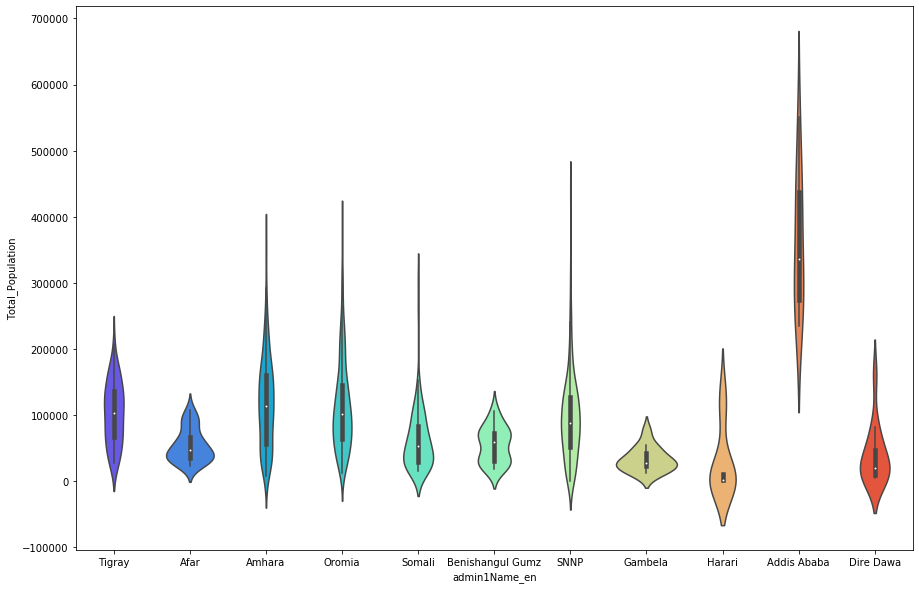

In [17]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.violinplot(x="admin1Name_en", y="Total_Population", data=Fulltable,palette='rainbow')
plt.show()

In [18]:
def CHOROMAP(DF,JSON,LOCATION,FEATUREKEY,COLOR,RANGE_L,RANGE_U, TITLE):
    Figure = px.choropleth_mapbox(DF, 
                        geojson=JSON, 
                        locations=LOCATION, featureidkey=FEATUREKEY,
                        color=COLOR,
                        color_continuous_scale="portland",
                        range_color=(RANGE_L, RANGE_U),
                        mapbox_style="carto-positron",
                        zoom=5, center = {"lat": 9, "lon": 39},
                        opacity=0.5,
                        hover_name='admin3Name_en',
                        hover_data=["admin1Name_en", "Total_Population", "Area_Km"],
                        labels={
                            'Population_Density':'Population Density',
                            'Total_Population':'Total Population',
                            'admin1Name_en':'Province',
                            'Area_Km':'Square Kilometer'
                        },
                        title = TITLE
                        )
    
    Figure.update_layout(
    margin={"r":0,"t":0,"l":0,"b":0},
    title={
            'text': TITLE,
            'y':0.9,
            'x':0.4,
            'xanchor': 'center',
            'yanchor': 'top'}
    )
    return Figure

JSON_ON     = counties3
Location_ON = 'admin3Pcode'
Feature_ON  = 'properties.ADM3_PCODE'

Color_ON    = 'Total_Population'
#Pop_Map = CHOROMAP(Fulltable,JSON_ON, Location_ON, Feature_ON, Color_ON, 25000, 300000,'Total Population of a Region')

Color_ON    = 'Population_Density'
#Dens_Map = CHOROMAP(Fulltable,JSON_ON, Location_ON, Feature_ON, Color_ON, 50, 500,'Population Density of a Region')


In [19]:
#plotly.offline.plot(Pop_Map, filename=r'C:\Users\johnmeye\Documents\GitHub\Ethiopia\Plotly\Population.html', auto_open=False)
#plotly.offline.plot(Dens_Map, filename=r'C:\Users\johnmeye\Documents\GitHub\Ethiopia\Plotly\Population Density.html', auto_open=False)
#

In [20]:
IFrame("Plotly/Population.html", 990,750)

In [21]:
IFrame("Plotly/Population Density.html", 990,750)

# Figuring out the site types

This is the step just prior to working out how many of each kind of router we will need. Now that we know about the different population densities; we can catagories them into the different catagories that they have provided for us. 

Catagories are: 
1. Dense-Urban
2. Urban
3. Sub-Urban
3. Rural
4. Deep-Rural

The result of this catagorising would be that the system would then know how the access type needs to be designed. The following image shows how they expect it to be.

![Microwave Connection](Graphics\SiteConnection.png)

The breakdown would require then that there are specific rules in place for how many towers per catagory before we have a fibre connection. 

The Ethiopian Access Microwave network needs to ensure the highest level of stability. It is also important that network remains congestion free during failures. Therefore, the following guidelines should be adhered to:

1. Maximum of 4 Microwave Hops in a chain, 3 Hops in a chain according to capacities of the Vodafone calculator. The 4th hop (closest to the traditional BSC or aggregation backhaul point) needs to be protected. Plan for double the capacity required. These N+0 links must be used.
2. 5 Microwave sites in a star configuration (1st hop closest to the traditional BSC or aggregation point needs to be protected, planned for double capacity)
3. 4 Microwave Hops in chain protected by a full Microwave Ring 
4. 4 Microwave Hops in chain protected by a Mixed MW and Fibre Ring
5. Mesh topology with multiple aggregation points

The following image shows the planned layout of the network as per the Ethiotel backbone.




The breakdown would require then that there are specific rules in place for how many towers per catagory before we have a fibre connection. 

The Ethiopian Access Microwave network needs to ensure the highest level of stability. It is also important that network remains congestion free during failures. Therefore, the following guidelines should be adhered to:

1. Maximum of 4 Microwave Hops in a chain, 3 Hops in a chain according to capacities of the Vodafone calculator. The 4th hop (closest to the traditional BSC or aggregation backhaul point) needs to be protected. Plan for double the capacity required. These N+0 links must be used.
2. 5 Microwave sites in a star configuration (1st hop closest to the traditional BSC or aggregation point needs to be protected, planned for double capacity)
3. 4 Microwave Hops in chain protected by a full Microwave Ring 
4. 4 Microwave Hops in chain protected by a Mixed MW and Fibre Ring
5. Mesh topology with multiple aggregation points

The following image shows the planned layout of the network as per the Ethiotel backbone.


# Cisco Network Design Components


![Solution Components](Graphics\Solution_Components.png)

![Solution Components](Graphics\Component_Matching.png)

## Core Network of POC1 -> 3

If we take the overlay of our fibre POC1-POC3 sites from the previous figure we have the following network which appears.


![Core Network](Graphics\Core_Network.jpg)

## Comparing the Fibre Layout to the Density

If we take the overlay of our fibre POC1-POC3 sites from the previous figure we have the following network which appears.

![Density and Core Network](Graphics\Density_Overlay.png)


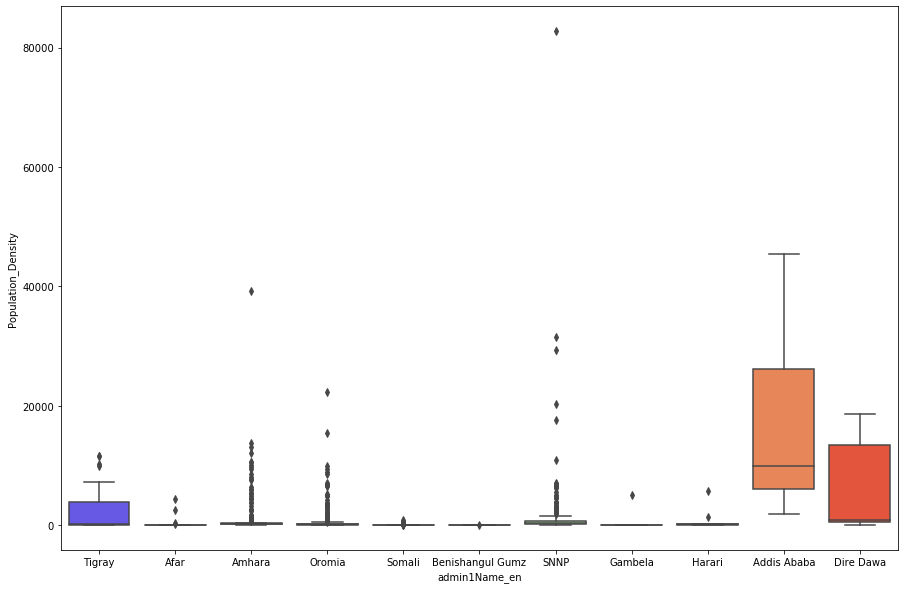

In [22]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.boxplot(x="admin1Name_en", y="Population_Density", data=Fulltable,palette='rainbow')


## Understanding the population density

The above figure shows that there is a some extremely dense portions of the country, Addis, Dire, Tigray, with some outlier towns in many of the other regions.

I suspect though that the towns might be showing as overly dense because rural people register at the towns and push up the numbers artificially. 

But we have two pieces of information which will help to decide what we do.

1. The population for a specific area
2. The calculated population density for an area which is calculated from the total country size and the region size.

Using these two together we should be able to place the regions into specific buckets. 

1. Dense Urban = Population Denser then 1000 people per km^2
2. Urban = Population Denser then 500 people but less then 1000 people per km^2
3. Sub-Urban = Population density between 175 and 500 people per km^2 (I updated this a bit because 200 was leaving out some key areas; many sites were on the 180-190 people/km^2 range)
4. Rural = Population density between 100 and 175 people per km^2
5. Deep-Rural = Population density less then 100 people per km^2

### Todo: Make this a dropdown so that we can select the range of each one to play around with it and figure out what is best.

In [23]:
Fulltable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 982
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   admin3Name_en       983 non-null    object 
 1   admin3Pcode         983 non-null    object 
 2   admin2Name_en       983 non-null    object 
 3   admin2Pcode         983 non-null    object 
 4   admin1Name_en       983 non-null    object 
 5   admin1Pcode         983 non-null    object 
 6   Total_Population    982 non-null    float64
 7   Shape_Area          983 non-null    float64
 8   Area_Km             983 non-null    float64
 9   Population_Density  982 non-null    float64
dtypes: float64(4), object(6)
memory usage: 124.5+ KB


In [24]:
DU_Thresh = 1000
U_Thresh = 400
SU_Thresh = 175
R_Thresh = 100
DR_Thresh = 0

def AREA_TYPE(Population, Population_Density):
    
    if Population_Density >= DU_Thresh:
        return 'Dense Urban'
    elif U_Thresh <= Population_Density < DU_Thresh:
        return 'Urban'
    elif SU_Thresh <= Population_Density < U_Thresh:
        return 'Sub-Urban'    
    elif R_Thresh <= Population_Density < SU_Thresh:
        return 'Rural'
    else:
        return 'Deep Rural'

Fulltable['Area_Type'] = Fulltable.apply(lambda x: AREA_TYPE(x.Total_Population, x.Population_Density), axis=1)

# Using Area_Type to define what Routers will be needed

## Information available

The Choropleth map can not be subdivided into regions and sites. We have the information on the following to help make this decision

1. Population in an area
2. Size of an area
3. Type of area
4. Number of sites planned by vodacom for the area

## Site counts

Vodacom has given the number of sites it plans on a provincial level. But as can already be seen by the images above, the sites are extremely large and should be broken down further. Their methods they used was to break up the area types per year, Rural/Suburban etc... The question now comes in on how to approach this division. 

## Site connectivity
With this information we should be able to make the decision of how to split up the sites and how to connect them.

The breakdown is as follows:

1. For Rural and Deep Rural; the sites will all be MW linking back to the backhaul via MW sites. 
2. For Sub-Urban we will be able to have a mix of MW and Fibre, back to the nearest Urban location. Typically less then 80km away. 
3. For the Urbun and Dense-Urbun, we will be able to have fibre exclusively according to Vodacom planning.


In [25]:
#for i in Fulltable.admin1Name_en.unique():
#    
#    Area_Breakdown = Fulltable[Fulltable['admin1Name_en']== i]['Area_Type'].value_counts()
#    print(i)
#    print(Area_Breakdown)
#
# or simpler:

Area_Breakdown = Fulltable.groupby(['admin1Name_en','Area_Type']).count()
Area_Breakdown['admin3Name_en']

admin1Name_en     Area_Type  
Addis Ababa       Dense Urban     10
Afar              Deep Rural      31
                  Dense Urban      2
                  Sub-Urban        2
Amhara            Deep Rural      28
                  Dense Urban     38
                  Rural           67
                  Sub-Urban       46
                  Urban            4
Benishangul Gumz  Deep Rural      19
                  Rural            1
Dire Dawa         Dense Urban      6
                  Rural            2
                  Sub-Urban        1
                  Urban            4
Gambela           Deep Rural      14
                  Dense Urban      1
Harari            Deep Rural       4
                  Dense Urban      2
                  Rural            3
Oromia            Deep Rural      81
                  Dense Urban     39
                  Rural           88
                  Sub-Urban      110
                  Urban           17
SNNP              Deep Rural      26
        

In [26]:
dfDU = Fulltable[Fulltable['Area_Type']=='Dense Urban']
dfU = Fulltable[Fulltable['Area_Type']=='Urban']
dfSU = Fulltable[Fulltable['Area_Type']=='Sub-Urban']
dfR = Fulltable[Fulltable['Area_Type']=='Rural']
dfDR = Fulltable[Fulltable['Area_Type']=='Deep Rural']


In [27]:
def CHOROMAP(DF,JSON,LOCATION,FEATUREKEY,COLOR,RANGE_L,RANGE_U, TITLE):
    Figure = px.choropleth_mapbox(DF, 
                        geojson=JSON, 
                        locations=LOCATION, featureidkey=FEATUREKEY,
                        color=COLOR,
                        color_continuous_scale="portland",
                        range_color=(RANGE_L, RANGE_U),
                        mapbox_style="carto-positron",
                        zoom=5, center = {"lat": 9, "lon": 39},
                        opacity=0.5,
                        hover_name='admin3Name_en',
                        hover_data=["admin1Name_en", "Total_Population", "Area_Km"],
                        labels={
                            'Population_Density':'Population Density',
                            'Total_Population':'Total Population',
                            'admin1Name_en':'Province',
                            'Area_Km':'Square Kilometer'
                                },
                        title = TITLE
                          )
    
    Figure.update_layout(
    margin={"r":0,"t":0,"l":0,"b":0},
    title={
            'text': TITLE,
            'y':0.9,
            'x':0.4,
            'xanchor': 'center',
            'yanchor': 'top'}
    )
    return Figure

JSON_ON     = counties3
Location_ON = 'admin3Pcode'
Feature_ON  = 'properties.ADM3_PCODE'
Color_ON    = 'Population_Density'
#
#DU_Map = CHOROMAP(dfDU,JSON_ON, Location_ON, Feature_ON, Color_ON, DU_Thresh, 5000,'Site Type: Dense Urban')
#U_Map  = CHOROMAP(dfU,JSON_ON, Location_ON, Feature_ON, Color_ON, U_Thresh, DU_Thresh, 'Site Type: Urban')
#SU_Map = CHOROMAP(dfSU,JSON_ON, Location_ON, Feature_ON, Color_ON, SU_Thresh, U_Thresh, 'Site Type: Sub Urban')
#R_Map  = CHOROMAP(dfR,JSON_ON, Location_ON, Feature_ON, Color_ON, R_Thresh, SU_Thresh, 'Site Type: Rural')
#DR_Map = CHOROMAP(dfDR,JSON_ON, Location_ON, Feature_ON, Color_ON, DR_Thresh, R_Thresh, 'Site Type: Deep Rural')


In [28]:
#plotly.offline.plot(DU_Map, filename=r'C:\Users\johnmeye\Documents\GitHub\Ethiopia\Plotly\DU_Map.html', auto_open=False)
#plotly.offline.plot(U_Map, filename=r'C:\Users\johnmeye\Documents\GitHub\Ethiopia\Plotly\U_Map.html', auto_open=False)
#plotly.offline.plot(SU_Map, filename=r'C:\Users\johnmeye\Documents\GitHub\Ethiopia\Plotly\SU_Map.html', auto_open=False)
#plotly.offline.plot(R_Map, filename=r'C:\Users\johnmeye\Documents\GitHub\Ethiopia\Plotly\R_Map.html', auto_open=False)
#plotly.offline.plot(DR_Map, filename=r'C:\Users\johnmeye\Documents\GitHub\Ethiopia\Plotly\DR_Map.html', auto_open=False)

In [29]:
IFrame("Plotly/DU_Map.html", 990,750)

In [30]:
IFrame("Plotly/DR_Map.html", 990,750)

## Dividing the Cell Towers into regions

The challenge comes from the division of the towers up into the various areas. We know what areas are considered Urban/Sub-Urban and so forth. A choice must be made how to split each year's towers up.

The other choice would be if each area in the province should get a tower. In the deep rural sites this might not be entirely possible. 

For now the choice i will make is to divide the towers up proportionally to the amount of people who live in the specific province. Should this be an issue we can rework on this calculation again after meeting with Vodacom.

The total Sites keeps the information for the sites by year.



In [31]:
###
#So i found this section of code on StackExchange trying to figure out how to do this kind of calculation. 
#ultimately its quite complex to handle the multiple index's and locations to build out the sites. 
#This code works out the percentage of population in each province that lives in the specific Admin3 area.
#The sum of the percentages in each Admin3 will add to 100% in their respective Admin1 level.
###

Population_Grouping = Fulltable.groupby(['admin1Name_en','admin3Pcode']).agg({'Total_Population': 'sum'})
Population_PCT = Population_Grouping.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

Proportional = Population_PCT.reset_index() #If you want to convert back to a normal dataframe and not a Multi-Index frame.
#Making a Sites Rollout sheet to work out how to build out the sites.
Sites_Rollout = Fulltable[['admin1Name_en','admin3Pcode','admin3Name_en','Area_Type']]
Sites_Rollout = pd.merge(Sites_Rollout, TotalSites, how="left", on=["admin1Name_en"])
Sites_Rollout = pd.merge(Sites_Rollout, Proportional[['Total_Population','admin3Pcode']], how="left", on=["admin3Pcode"])



## Working out the Sites Rollout for a specific area

The challenge has always been to breakdown how the sites will be broken down. 

Below you will see there are two tables; the Sites_Rollout (Which was calculated by us with the help of understanding what the population grouping is), so this breaks the rollout into the specific Admin3 areas. I show both the admin1/admin3 grouping and the admin1 summation. 

The second one is the Table provided by Vodacom for this rollout. 

### Discrepencies

1. This occurs because i'm having to use some imprecise rounding on the populations. Because we are linking to the percentage of the population subgroup there will always be decimals. 

     a. The option exists to round-up as well; so sites which have below 0.5 sites scheduled for whatever reason would be able to get a site. But this might mean that we build into extremely remote regions. 
     

2. I adjusted the area of one or two of the areas in the admin3 area. This was because they had a NaN input but did have an area, so i calculated it; but it now makes some areas add up to more then 100%. Which is not a big problem for now. 


In [32]:
Sites_Rollout.groupby('admin1Name_en').sum()


Year1     Year2     Year3     Year4     Year5     Year6  \
admin1Name_en                                                                 
Addis Ababa        2820.0       0.0       0.0       0.0       0.0     940.0   
Afar               2135.0      70.0     105.0    1295.0    1505.0     910.0   
Amhara            66612.0   77226.0   49593.0   24339.0   11163.0   47214.0   
Benishangul Gumz    560.0       0.0      40.0     420.0     580.0     720.0   
Dire Dawa           572.0       0.0       0.0       0.0       0.0     221.0   
Gambela             225.0       0.0      30.0     120.0     150.0     150.0   
Harari              288.0       0.0       0.0      18.0       0.0      27.0   
Oromia            77385.0  138020.0  165825.0  173530.0  154435.0  161135.0   
SNNP              14416.0   27772.0   37948.0   54484.0   37948.0   26076.0   
Somali            16137.0    2277.0    3069.0    6039.0    8217.0    7425.0   
Tigray             2756.0     520.0    6552.0    7904.0     780.0    6760.0   

                     Year7     Year8     Year9    Year10    Year11  \
admin1Name_en                                                        
Addis Ababa          680.0    1550.0    2530.0     260.0      60.0   
Afar                2380.0    1050.0    2345.0     770.0    2520.0   
Amhara             41358.0   37332.0   37881.0   64782.0   75213.0   
Benishangul Gumz     760.0     680.0     960.0      60.0     640.0   
Dire Dawa            260.0     390.0     221.0      52.0      78.0   
Gambela              195.0     420.0     540.0      15.0     225.0   
Harari                72.0     207.0     144.0       0.0     117.0   
Oromia            134000.0  139025.0  148405.0  181235.0  256610.0   
SNNP               24380.0   18444.0   13356.0   81832.0   26924.0   
Somali             13860.0   10098.0   12474.0    5148.0   15939.0   
Tigray              5564.0    5928.0    5720.0    3484.0    3900.0   

                  Shape_Area_Admin1      Total  Total_Population  
admin1Name_en                                                     
Addis Ababa                0.443690     8840.0             100.0  
Afar                     275.785335    15085.0             100.0  
Amhara                  2360.966082   532713.0             100.0  
Benishangul Gumz          82.986100     5420.0             100.0  
Dire Dawa                  1.127841     1794.0             100.0  
Gambela                   38.413650     2070.0             100.0  
Harari                     0.274608      873.0             100.0  
Oromia                  8869.011100  1729605.0             100.0  
SNNP                    1892.847936   363580.0             100.0  
Somali                  2521.203993   100683.0             100.0  
Tigray                   228.754292    49868.0             100.0

In [33]:
for column in Sites_Rollout.iloc[:, 4:15]:
    Sites_Rollout[column] =np.round(Sites_Rollout[column]*Sites_Rollout['Total_Population']/100)

Sites_Rollout['Total'] =Sites_Rollout.iloc[:, 4:15].sum(axis=1)


In [34]:
Sites_Rollout.replace(0, np.nan, inplace=True)

In [35]:
Planned = Sites_Rollout.groupby('admin1Name_en').sum()
Asked = TotalSites.groupby('admin1Name_en').sum()
Spare_Sites = Asked.subtract(Planned)
Spare_Sites = Spare_Sites.drop(['Shape_Area_Admin1','Total_Population'], axis=1)
Spare_Sites

Total  Year1  Year10  Year11  Year2  Year3  Year4  Year5  \
admin1Name_en                                                                
Addis Ababa         4.0    1.0     1.0     0.0    0.0    0.0    0.0    0.0   
Afar               12.0    1.0     4.0     2.0    2.0    3.0   -3.0   -1.0   
Amhara             60.0   -2.0    -5.0    -3.0   -2.0    9.0    2.0   29.0   
Benishangul Gumz    4.0   -2.0     3.0    -1.0    0.0    2.0    1.0   -2.0   
Dire Dawa           6.0    1.0     1.0     1.0    0.0    0.0    0.0    0.0   
Gambela             0.0    1.0     1.0     1.0    0.0    2.0    1.0   -2.0   
Harari              4.0    2.0     0.0     0.0    0.0    0.0    0.0    0.0   
Oromia              4.0    6.0     8.0     1.0   -3.0   -2.0    2.0   -2.0   
SNNP               94.0   39.0     1.0    -4.0   -3.0    1.0    0.0    1.0   
Somali             50.0  -10.0     6.0   -12.0   18.0   12.0    7.0    7.0   
Tigray             11.0   -1.0    -1.0     2.0   10.0    0.0   -5.0   13.0   

                  Year6  Year7  Year8  Year9  
admin1Name_en                                 
Addis Ababa         0.0    1.0    0.0    1.0  
Afar                1.0    2.0    0.0    1.0  
Amhara              7.0    6.0   10.0    9.0  
Benishangul Gumz    2.0    0.0    0.0    1.0  
Dire Dawa           2.0    0.0   -1.0    2.0  
Gambela            -2.0    0.0   -1.0   -1.0  
Harari              0.0    1.0    1.0    0.0  
Oromia             -4.0    3.0   -5.0    0.0  
SNNP               -4.0    4.0   20.0   39.0  
Somali              7.0    8.0    4.0    3.0  
Tigray             -1.0   -1.0   -3.0   -2.0

In [36]:
Sites_Rollout.groupby(['admin1Name_en','Area_Type','admin3Name_en']).sum()

Year1  Year2  Year3  Year4  Year5  \
admin1Name_en Area_Type   admin3Name_en                                         
Addis Ababa   Dense Urban Addis Ketema       26.0    0.0    0.0    0.0    0.0   
                          Akaki - Kalit      18.0    0.0    0.0    0.0    0.0   
                          Arada              21.0    0.0    0.0    0.0    0.0   
                          Bole               33.0    0.0    0.0    0.0    0.0   
                          Gulele             27.0    0.0    0.0    0.0    0.0   
...                                           ...    ...    ...    ...    ...   
Tigray        Rural       Saesie Tsaedamba    2.0    0.0    4.0    5.0    0.0   
                          Tahtay Koraro       1.0    0.0    2.0    2.0    0.0   
                          Werei Leke          2.0    0.0    4.0    5.0    0.0   
              Sub-Urban   Ganta Afeshum       1.0    0.0    2.0    3.0    0.0   
                          Tahtay Mayechew     1.0    0.0    2.0    3.0    0.0   

                                            Year6  Year7  Year8  Year9  \
admin1Name_en Area_Type   admin3Name_en                                  
Addis Ababa   Dense Urban Addis Ketema        9.0    6.0   14.0   23.0   
                          Akaki - Kalit       6.0    4.0   10.0   17.0   
                          Arada               7.0    5.0   12.0   19.0   
                          Bole               11.0    8.0   18.0   29.0   
                          Gulele              9.0    7.0   15.0   24.0   
...                                           ...    ...    ...    ...   
Tigray        Rural       Saesie Tsaedamba    4.0    3.0    4.0    3.0   
                          Tahtay Koraro       2.0    2.0    2.0    2.0   
                          Werei Leke          4.0    3.0    4.0    4.0   
              Sub-Urban   Ganta Afeshum       2.0    2.0    2.0    2.0   
                          Tahtay Mayechew     3.0    2.0    2.0    2.0   

                                            Year10  Year11  Shape_Area_Admin1  \
admin1Name_en Area_Type   admin3Name_en                                         
Addis Ababa   Dense Urban Addis Ketema         2.0     1.0           0.044369   
                          Akaki - Kalit        2.0     0.0           0.044369   
                          Arada                2.0     0.0           0.044369   
                          Bole                 3.0     1.0           0.044369   
                          Gulele               2.0     1.0           0.044369   
...                                            ...     ...                ...   
Tigray        Rural       Saesie Tsaedamba     2.0     2.0           4.399121   
                          Tahtay Koraro        1.0     1.0           4.399121   
                          Werei Leke           2.0     2.0           4.399121   
              Sub-Urban   Ganta Afeshum        1.0     1.0           4.399121   
                          Tahtay Mayechew      1.0     1.0           4.399121   

                                            Total  Total_Population  
admin1Name_en Area_Type   admin3Name_en                              
Addis Ababa   Dense Urban Addis Ketema       81.0          9.143184  
                          Akaki - Kalit      57.0          6.548580  
                          Arada              66.0          7.574473  
                          Bole              103.0         11.621862  
                          Gulele             85.0          9.582584  
...                                           ...               ...  
Tigray        Rural       Saesie Tsaedamba   29.0          3.112297  
                          Tahtay Koraro      15.0          1.445040  
                          Werei Leke         30.0          3.232190  
              Sub-Urban   Ganta Afeshum      16.0          1.895229  
                          Tahtay Mayechew    17.0          1.977346  

[983 rows x 14 columns]

In [37]:
Sites_Rollout.groupby('Area_Type').sum()

Year1  Year2  Year3  Year4  Year5  Year6  Year7  Year8  Year9  \
Area_Type                                                                    
Deep Rural   335.0  138.0  188.0  276.0  230.0  286.0  345.0  296.0  367.0   
Dense Urban  409.0   92.0  111.0  119.0   63.0  206.0  165.0  272.0  354.0   
Rural        249.0  305.0  323.0  299.0  171.0  315.0  278.0  268.0  271.0   
Sub-Urban    262.0  353.0  348.0  344.0  265.0  341.0  304.0  285.0  286.0   
Urban         50.0   90.0  112.0  146.0  109.0   97.0   87.0   76.0   55.0   

             Year10  Year11  Shape_Area_Admin1   Total  Total_Population  
Area_Type                                                                 
Deep Rural    240.0   463.0        5318.767162  3164.0        423.438388  
Dense Urban   172.0   155.0        1996.294674  2118.0        319.734386  
Rural         376.0   425.0        3625.102236  3280.0        155.786865  
Sub-Urban     451.0   531.0        4128.231410  3770.0        129.246419  
Urban         198.0   123.0        1203.419145  1143.0         71.793942

In [38]:
def CHOROMAP(DF,JSON,LOCATION,FEATUREKEY,COLOR,RANGE_L,RANGE_U, TITLE):
    Figure = px.choropleth_mapbox(DF, 
                        geojson=JSON, 
                        locations=LOCATION, featureidkey=FEATUREKEY,
                        color=COLOR,
                        color_continuous_scale="portland",
                        range_color=(RANGE_L, RANGE_U),
                        mapbox_style="carto-positron",
                        zoom=5, center = {"lat": 9, "lon": 39},
                        opacity=0.5,
                        hover_name='admin3Name_en',
                        hover_data=["admin1Name_en", "Year1", "Year2", "Year3","Year4", "Year5", "Year6" ],
                        labels={
                            'Population_Density':'Population Density',
                            'Total_Population':'Total Population',
                            'admin1Name_en':'Province',
                            'Area_Km':'Square Kilometer'
                                },
                        title = TITLE
                          )
    
    Figure.update_layout(
    margin={"r":0,"t":0,"l":0,"b":0},
    title={
            'text': TITLE,
            'y':0.9,
            'x':0.4,
            'xanchor': 'center',
            'yanchor': 'top'}
    )
    return Figure

JSON_ON     = counties3
Location_ON = 'admin3Pcode'
Feature_ON  = 'properties.ADM3_PCODE'


for i in range(1,12):
    Color_ON    = 'Year'+str(i)
    Title       = "Rollout Year " + str(i)
    Saved       = r'C:\Users\johnmeye\Documents\GitHub\Ethiopia\Plotly\Sites_Rollout_Map'+str(i)+'.html'
    #Sites_Rollout_Map = CHOROMAP(Sites_Rollout, JSON_ON, Location_ON, Feature_ON, Color_ON, 0, 5, Title)
    #plotly.offline.plot(Sites_Rollout_Map, filename=Saved, auto_open=False)



In [39]:
admin1Name_en_Sites_Rollout = Sites_Rollout.groupby(['Area_Type','admin3Name_en']).sum()
admin1Name_en_Sites_Rollout

Year1  Year2  Year3  Year4  Year5  Year6  Year7  \
Area_Type  admin3Name_en                                                    
Deep Rural Aba 'Ala         2.0    0.0    0.0    1.0    1.0    1.0    2.0   
           Aba-korow        1.0    0.0    0.0    0.0    0.0    0.0    1.0   
           Ababo            0.0    1.0    1.0    1.0    1.0    1.0    1.0   
           Abay Chomen      0.0    1.0    1.0    1.0    1.0    1.0    1.0   
           Abaya            1.0    2.0    2.0    2.0    2.0    2.0    1.0   
...                         ...    ...    ...    ...    ...    ...    ...   
Urban      Wera Djo         1.0    2.0    2.0    3.0    2.0    2.0    1.0   
           Wondo-Genet      0.0    1.0    1.0    2.0    1.0    1.0    1.0   
           Wonosho          0.0    1.0    1.0    1.0    1.0    1.0    1.0   
           Yebeklo Segno    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
           Yirgachefe       1.0    1.0    2.0    2.0    2.0    1.0    1.0   

                          Year8  Year9  Year10  Year11  Shape_Area_Admin1  \
Area_Type  admin3Name_en                                                    
Deep Rural Aba 'Ala         1.0    2.0     1.0     2.0           7.879581   
           Aba-korow        0.0    1.0     0.0     1.0          25.466707   
           Ababo            1.0    1.0     1.0     1.0          26.474660   
           Abay Chomen      1.0    1.0     1.0     1.0          26.474660   
           Abaya            2.0    2.0     2.0     3.0          26.474660   
...                         ...    ...     ...     ...                ...   
Urban      Wera Djo         1.0    1.0     5.0     2.0           8.928528   
           Wondo-Genet      1.0    0.0     3.0     1.0           8.928528   
           Wonosho          0.0    0.0     2.0     1.0           8.928528   
           Yebeklo Segno    0.0    0.0     0.0     0.0           8.928528   
           Yirgachefe       1.0    1.0     3.0     1.0           8.928528   

                          Total  Total_Population  
Area_Type  admin3Name_en                           
Deep Rural Aba 'Ala        13.0          2.524103  
           Aba-korow        4.0          0.475897  
           Ababo           10.0          0.164213  
           Abay Chomen     10.0          0.179544  
           Abaya           21.0          0.373897  
...                         ...               ...  
Urban      Wera Djo        22.0          1.291286  
           Wondo-Genet     12.0          0.711559  
           Wonosho          9.0          0.461176  
           Yebeklo Segno    0.0          0.020735  
           Yirgachefe      16.0          0.842223  

[983 rows x 14 columns]

In [40]:
Sites_Rollout

admin1Name_en admin3Pcode    admin3Name_en   Area_Type  Year1  Year2  \
0          Tigray    ET010101   Tahtay Adiyabo  Deep Rural    1.0    NaN   
1          Tigray    ET010102    Laelay Adiabo  Deep Rural    1.0    NaN   
2          Tigray    ET010103     Medebay Zana       Rural    1.0    NaN   
3          Tigray    ET010104    Tahtay Koraro       Rural    1.0    NaN   
4          Tigray    ET010105  Asgede Tsimbila  Deep Rural    2.0    NaN   
..            ...         ...              ...         ...    ...    ...   
978     Dire Dawa    ET150114     Police Maret       Urban    NaN    NaN   
979     Dire Dawa    ET150201          Aseliso       Urban    6.0    NaN   
980     Dire Dawa    ET150206         Jeldessa       Rural    4.0    NaN   
981     Dire Dawa    ET150207            Wahil   Sub-Urban    3.0    NaN   
982     Dire Dawa    ET150208        Biyoawale       Rural    3.0    NaN   

     Year3  Year4  Year5  Year6  Year7  Year8  Year9  Year10  Year11  \
0      2.0    3.0    NaN    3.0    2.0    2.0    2.0     1.0     1.0   
1      3.0    4.0    NaN    3.0    3.0    3.0    3.0     2.0     2.0   
2      3.0    4.0    NaN    4.0    3.0    3.0    3.0     2.0     2.0   
3      2.0    2.0    NaN    2.0    2.0    2.0    2.0     1.0     1.0   
4      4.0    5.0    NaN    4.0    3.0    3.0    3.0     2.0     2.0   
..     ...    ...    ...    ...    ...    ...    ...     ...     ...   
978    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN   
979    NaN    NaN    NaN    2.0    3.0    4.0    2.0     1.0     1.0   
980    NaN    NaN    NaN    2.0    2.0    3.0    2.0     NaN     1.0   
981    NaN    NaN    NaN    1.0    1.0    2.0    1.0     NaN     NaN   
982    NaN    NaN    NaN    1.0    2.0    2.0    1.0     NaN     NaN   

     Shape_Area_Admin1  Total  Total_Population  
0             4.399121   17.0          1.953604  
1             4.399121   24.0          2.380621  
2             4.399121   25.0          2.727719  
3             4.399121   15.0          1.445040  
4             4.399121   28.0          3.031744  
..                 ...    ...               ...  
978           0.086757    NaN          0.952289  
979           0.086757   19.0         13.297425  
980           0.086757   14.0          9.308961  
981           0.086757    8.0          6.957731  
982           0.086757    9.0          7.560347  

[983 rows x 18 columns]

## Dividing the sites up to calculate Fibre and MW site counts

We have already identified the sites numbers per region, divided up the deployment sites into the area.

The next step is to now divids the Area-types up. Technically the area_type is already available, but we would need to make some decisions around this. 

I have chosen to do the following:

1. Dense Urban and Urban are all Fibre Sites, so each site is 1:1 and Access Type switch with an NCS540.
2. The Sub-Urban sites will be some Fibre and Some MW, I will make an Assumption of 50:50 for this to start.
3. The Rural and Deep Rural sites are all MW. 

So we will have three dataframes to do these calculations.

In [41]:
Full_Fibre = Sites_Rollout[(Sites_Rollout['Area_Type']=='Urban') | (Sites_Rollout['Area_Type']=='Dense Urban') ]
Mixed = Sites_Rollout[(Sites_Rollout['Area_Type']=='Sub-Urban')]
Full_MW = Sites_Rollout[(Sites_Rollout['Area_Type']=='Rural') | (Sites_Rollout['Area_Type']=='Deep Rural') ]

In [42]:
Mixed

admin1Name_en admin3Pcode    admin3Name_en  Area_Type  Year1  Year2  \
13         Tigray    ET010206  Tahtay Mayechew  Sub-Urban    1.0    NaN   
23         Tigray    ET010304    Ganta Afeshum  Sub-Urban    1.0    NaN   
61           Afar    ET020198    Logiya-Semera  Sub-Urban    1.0    NaN   
63           Afar    ET020202          Kunneba  Sub-Urban    2.0    NaN   
96         Amhara    ET030202      Libokemekem  Sub-Urban    4.0    5.0   
..            ...         ...              ...        ...    ...    ...   
914          SNNP    ET071801           Gachit  Sub-Urban    NaN    1.0   
924          SNNP    ET072003          Lanfero  Sub-Urban    1.0    1.0   
926          SNNP    ET072005          Dalocha  Sub-Urban    NaN    1.0   
929          SNNP    ET072008         Wilbareg  Sub-Urban    NaN    1.0   
981     Dire Dawa    ET150207            Wahil  Sub-Urban    3.0    NaN   

     Year3  Year4  Year5  Year6  Year7  Year8  Year9  Year10  Year11  \
13     2.0    3.0    NaN    3.0    2.0    2.0    2.0     1.0     1.0   
23     2.0    3.0    NaN    2.0    2.0    2.0    2.0     1.0     1.0   
61     NaN    1.0    1.0    NaN    1.0    NaN    1.0     NaN     1.0   
63     NaN    1.0    1.0    1.0    2.0    1.0    2.0     1.0     2.0   
96     3.0    2.0    1.0    3.0    3.0    2.0    2.0     4.0     5.0   
..     ...    ...    ...    ...    ...    ...    ...     ...     ...   
914    1.0    1.0    1.0    1.0    1.0    NaN    NaN     2.0     1.0   
924    2.0    2.0    2.0    1.0    1.0    1.0    1.0     3.0     1.0   
926    1.0    1.0    1.0    1.0    1.0    NaN    NaN     2.0     1.0   
929    1.0    1.0    1.0    1.0    NaN    NaN    NaN     2.0     1.0   
981    NaN    NaN    NaN    1.0    1.0    2.0    1.0     NaN     NaN   

     Shape_Area_Admin1  Total  Total_Population  
13            4.399121   17.0          1.977346  
23            4.399121   16.0          1.895229  
61            7.879581    6.0          1.473244  
63            7.879581   13.0          3.229053  
96           12.901454   34.0          1.204052  
..                 ...    ...               ...  
914           8.928528    9.0          0.441100  
924           8.928528   16.0          0.862294  
926           8.928528    9.0          0.551095  
929           8.928528    8.0          0.408021  
981           0.086757    8.0          6.957731  

[215 rows x 18 columns]

In [43]:
Fibre_Rollout = pd.DataFrame() 
Fibre_Rollout['admin1Name_en']=Full_Fibre['admin1Name_en']
Fibre_Rollout['admin3Name_en']=Full_Fibre['admin3Name_en']
Fibre_Rollout['admin3Pcode']=Full_Fibre['admin3Pcode']
Fibre_Rollout['Area_Type']=Full_Fibre['Area_Type']

for column in Full_Fibre.loc[:, 'Year1':'Year11']:    
    Fibre_Column = 'Fibre'+str(column)
    Fibre_Rollout.loc[:,Fibre_Column] = Full_Fibre.loc[:,column]*1
for column in Full_Fibre.loc[:, 'Year1':'Year11']:    
    MW_Column = 'MW'+ str(column)
    Fibre_Rollout.loc[:,MW_Column] = np.nan


In [44]:
Mixed_Rollout = pd.DataFrame() 
Mixed_Rollout['admin1Name_en']=Mixed['admin1Name_en']
Mixed_Rollout['admin3Name_en']=Mixed['admin3Name_en']
Mixed_Rollout['admin3Pcode']=Mixed['admin3Pcode']
Mixed_Rollout['Area_Type']=Mixed['Area_Type']


for column in Mixed.loc[:, 'Year1':'Year11']:
    Fibre_Column = 'Fibre'+str(column)
    Mixed_Rollout.loc[:,Fibre_Column] = np.ceil(Mixed.loc[:,column]*0.5)
    
for column in Mixed.loc[:, 'Year1':'Year11']:
    MW_Column = 'MW'+ str(column)
    Mixed_Rollout.loc[:,MW_Column] = np.floor(Mixed.loc[:,column]*0.5)


In [45]:
MW_Rollout = pd.DataFrame() 
MW_Rollout['admin1Name_en']=Full_MW['admin1Name_en']
MW_Rollout['admin3Name_en']=Full_MW['admin3Name_en']
MW_Rollout['admin3Pcode']=Full_MW['admin3Pcode']
MW_Rollout['Area_Type']=Full_MW['Area_Type']

for column in Full_MW.loc[:, 'Year1':'Year11']:
    Fibre_Column = 'Fibre'+str(column)
    MW_Rollout.loc[:,Fibre_Column] = np.nan

for column in Full_MW.loc[:, 'Year1':'Year11']:
    MW_Column = 'MW'+ str(column)
    MW_Rollout.loc[:,MW_Column] = Full_MW.loc[:,column]*1   
    


## Microwave as an option

If there is active sharing on a site; without applying, shaping and managing bandwidth; Microwave is extremely limited in its ability to share the network. 

Ethiotel is requesting that this is enforced. 

The request is that this is an end to end IP. So we must assume that the MW can Guaranty QoS fidelity for Vodafone and the sharing partner. 

The main issue will come with the requirement for the sharing. If there is an enterprise customer for example; how will they connect this enterprise to a vpn and the microwave. 


In [46]:
Mixed_Rollout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 13 to 981
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   admin1Name_en  215 non-null    object 
 1   admin3Name_en  215 non-null    object 
 2   admin3Pcode    215 non-null    object 
 3   Area_Type      215 non-null    object 
 4   FibreYear1     157 non-null    float64
 5   FibreYear2     189 non-null    float64
 6   FibreYear3     194 non-null    float64
 7   FibreYear4     202 non-null    float64
 8   FibreYear5     167 non-null    float64
 9   FibreYear6     193 non-null    float64
 10  FibreYear7     194 non-null    float64
 11  FibreYear8     179 non-null    float64
 12  FibreYear9     169 non-null    float64
 13  FibreYear10    202 non-null    float64
 14  FibreYear11    199 non-null    float64
 15  MWYear1        157 non-null    float64
 16  MWYear2        189 non-null    float64
 17  MWYear3        194 non-null    float64
 18  MWYear4  

In [47]:
Combined_MW_Rollout = pd.DataFrame()
Combined_MW_Rollout = Combined_MW_Rollout.append(MW_Rollout)
Combined_MW_Rollout = Combined_MW_Rollout.append(Mixed_Rollout)
Combined_MW_Rollout = Combined_MW_Rollout.drop(Combined_MW_Rollout.columns.to_series()["FibreYear1":"FibreYear11"], axis=1)
Combined_MW_Rollout.loc[:,'Total']= Combined_MW_Rollout.loc[:,'MWYear1':'MWYear11'].sum(numeric_only=True, axis=1)
Combined_MW_Rollout = pd.merge(Combined_MW_Rollout, Boundaries_Data3[['admin2Name_en','admin2Pcode','admin3Pcode']],how='left', on=['admin3Pcode']) #Site combined with the geodata. Sizing found early.
Combined_MW_Rollout['Access_Type'] = 'MW'


Combined_Fibre_Rollout = pd.DataFrame()
Combined_Fibre_Rollout = Combined_Fibre_Rollout.append(Fibre_Rollout)
Combined_Fibre_Rollout = Combined_Fibre_Rollout.append(Mixed_Rollout)
Combined_Fibre_Rollout = Combined_Fibre_Rollout.drop(Combined_MW_Rollout.columns.to_series()["MWYear1":"MWYear11"], axis=1)
Combined_Fibre_Rollout.loc[:,'Total']= Combined_Fibre_Rollout.loc[:,'FibreYear1':'FibreYear11'].sum(numeric_only=True, axis=1)
Combined_Fibre_Rollout = pd.merge(Combined_Fibre_Rollout, Boundaries_Data3[['admin2Name_en','admin2Pcode','admin3Pcode']],how='left', on=['admin3Pcode']) #Site combined with the geodata. Sizing found early.
Combined_Fibre_Rollout['Access_Type'] = 'Fiber'

Final_Rollout = pd.concat([Combined_MW_Rollout,Combined_Fibre_Rollout])

In [48]:
Final_Rollout.groupby(['admin1Name_en','admin2Name_en','admin3Name_en']).sum()

Final_Rollout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1198 entries, 0 to 470
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   admin1Name_en  1198 non-null   object 
 1   admin3Name_en  1198 non-null   object 
 2   admin3Pcode    1198 non-null   object 
 3   Area_Type      1198 non-null   object 
 4   MWYear1        529 non-null    float64
 5   MWYear2        465 non-null    float64
 6   MWYear3        528 non-null    float64
 7   MWYear4        604 non-null    float64
 8   MWYear5        491 non-null    float64
 9   MWYear6        605 non-null    float64
 10  MWYear7        620 non-null    float64
 11  MWYear8        582 non-null    float64
 12  MWYear9        580 non-null    float64
 13  MWYear10       590 non-null    float64
 14  MWYear11       666 non-null    float64
 15  Total          1198 non-null   float64
 16  admin2Name_en  1197 non-null   object 
 17  admin2Pcode    1197 non-null   object 
 18  Access_Ty

In [49]:
Combined_Fibre_Rollout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471 entries, 0 to 470
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   admin1Name_en  471 non-null    object 
 1   admin3Name_en  471 non-null    object 
 2   admin3Pcode    471 non-null    object 
 3   Area_Type      471 non-null    object 
 4   FibreYear1     264 non-null    float64
 5   FibreYear2     316 non-null    float64
 6   FibreYear3     346 non-null    float64
 7   FibreYear4     361 non-null    float64
 8   FibreYear5     288 non-null    float64
 9   FibreYear6     345 non-null    float64
 10  FibreYear7     336 non-null    float64
 11  FibreYear8     304 non-null    float64
 12  FibreYear9     272 non-null    float64
 13  FibreYear10    385 non-null    float64
 14  FibreYear11    367 non-null    float64
 15  Total          471 non-null    float64
 16  admin2Name_en  471 non-null    object 
 17  admin2Pcode    471 non-null    object 
 18  Access_Typ

In [50]:
def CHOROMAP(DF,JSON,LOCATION,FEATUREKEY,COLOR,RANGE_L,RANGE_U, TITLE):
    Figure = px.choropleth_mapbox(DF, 
                        geojson=JSON, 
                        locations=LOCATION, featureidkey=FEATUREKEY,
                        color=COLOR,
                        color_continuous_scale="portland",
                        range_color=(RANGE_L, RANGE_U),
                        mapbox_style="carto-positron",
                        zoom=5, center = {"lat": 9, "lon": 39},
                        opacity=0.5,
                        hover_name='admin3Name_en',
                        hover_data=["admin1Name_en"],
                        labels={
                            'Population_Density':'Population Density',
                            'Total_Population':'Total Population',
                            'admin1Name_en':'Province',
                            'Area_Km':'Square Kilometer'
                                },
                        title = TITLE
                          )
    
    Figure.update_layout(
    margin={"r":0,"t":0,"l":0,"b":0},
    title={
            'text': TITLE,
            'y':0.9,
            'x':0.4,
            'xanchor': 'center',
            'yanchor': 'top'}
    )
    return Figure

JSON_ON     = counties3
Location_ON = 'admin3Pcode'
Feature_ON  = 'properties.ADM3_PCODE'
Color_ON    = 'Total'


#Fibre_Map = CHOROMAP(Combined_Fibre_Rollout,JSON_ON, Location_ON, Feature_ON, Color_ON, 1, 25, 'Site Type: Fibre')
#MW_Map = CHOROMAP(Combined_MW_Rollout,JSON_ON, Location_ON, Feature_ON, Color_ON, 1, 30, 'Site Type: MicroWave')


In [56]:
##Finding a locaiton based on its name. 
LTC_Test = Sites_Rollout[(Sites_Rollout['admin3Pcode']=='ET040714')]
Test_Map = CHOROMAP(LTC_Test,JSON_ON, Location_ON, Feature_ON, Color_ON, 1, 25, 'Site Type: LTC Location')
plotly.offline.plot(Test_Map, filename=r'C:\Users\johnmeye\Documents\GitHub\Ethiopia\Plotly\Test_Map.html', auto_open=True)

'C:\\Users\\johnmeye\\Documents\\GitHub\\Ethiopia\\Plotly\\Test_Map.html'

In [52]:
#plotly.offline.plot(Fibre_Map, filename=r'C:\Users\johnmeye\Documents\GitHub\Ethiopia\Plotly\Fibre_Map.html', auto_open=False)
#plotly.offline.plot(MW_Map, filename=r'C:\Users\johnmeye\Documents\GitHub\Ethiopia\Plotly\MW_Map.html', auto_open=False)


In [53]:
IFrame("Plotly/Fibre_Map.html", 990,750)

In [54]:
IFrame("Plotly/MW_Map.html", 990,750)

## Having Disaggregated Radio Sites

The main benefit of Cisco is from the ability of the network service providers to disaggregate the radio control and sites from each other. 

This creates a number of benefits to the providers:
1. IP end to end
2. More efficient use of resources, such as Power/Cooling/Compute.
3. Better management of resources, more efficient operations and human resource utilizations.

![DCO Benefits](Graphics\Radio_Fibre_Connection.png)

However, Vodacom has stated that there will be no disaggregation of the reemote towers.

As a result the following assumption will be made. 
1. We will have a router on each access site with fibre.
2. As there is a BBU on site; then the requirement for eCPRI is removed. 
3. We will assume that in more dense locations with fibre; that the range is less then 80km to the regional POC3 router. 
4. POC3 Routers will feed into POC2 routers as per the rollup.

Because of the feedin; and the fibre sites; we should ideally convert the POC3 in the original planning to POC2 sites. 

# DCO Optics and Ethiopia Benefit

The smaller regions which have fibre are fairly small; we should be able to use the DCO optics to reach between the local POC3 and Access Sites. 

MW is not limited by distance, LOS is not known but we can assume as Below for the systems. 

![DCO](Graphics\Front-Haul_Dissagregation.png)

![Fibre Rules](Graphics\Design_Flowchart.png)
![Rules_2](Graphics\Design_Flowchart_2.png)



## Roll up into Admin2 areas for the Fibre and MW

It might make sense to roll the sites up into Admin 2 areas. 

So flow would go:
1. Access sites to Admin3 breakout, only if Access > 5 for the Admin3 region.
2. If <5 for the region; then access sites to the Admin2 sites, all Admin3 aggregation to Admin2 Aggregation
3. Admin2 to the local POC2/POC1 site for backhaul.



In [55]:
Level2_Fibre_Group = pd.merge(Combined_Fibre_Rollout, Boundaries_Data3[['admin3Pcode', 'admin2Pcode','admin2Name_en']],how='left', on=['admin3Pcode']) #Site combined with the geodata. Sizing found early.
Level2_Fibre_Group = Level2_Fibre_Group.groupby('admin2Pcode').sum()
Level2_Fibre_Group = Level2_Group.reset_index()
Level2_Fibre_Group = pd.merge(Level2_Group, Boundaries_Data2[['admin2Pcode']],how='left', on=['admin2Pcode']) #Site combined with the geodata. Sizing found early.

Level2_MW_Group = pd.merge(Combined_MW_Rollout, Boundaries_Data3[['admin3Pcode', 'admin2Pcode','admin2Name_en']],how='left', on=['admin3Pcode']) #Site combined with the geodata. Sizing found early.
Level2_MW_Group = Level2_MW_Group.groupby('admin2Pcode').sum()
Level2_MW_Group = Level2_MW_Group.reset_index()
Level2_MW_Group = pd.merge(Level2_MW_Group, Boundaries_Data2[['admin2Pcode','admin2Name_en']],how='left', on=['admin2Pcode']) #Site combined with the geodata. Sizing found early.


KeyError: 'admin2Pcode'

In [ ]:
# First Calculate the Regional Sites for each area to roll into. 
def CHOROMAP(DF,JSON,LOCATION,FEATUREKEY,COLOR,RANGE_L,RANGE_U, TITLE,*HOVER1):
    Figure = px.choropleth_mapbox(DF, 
                        geojson=JSON, 
                        locations=LOCATION, featureidkey=FEATUREKEY,
                        color=COLOR,
                        color_continuous_scale="portland",
                        range_color=(RANGE_L, RANGE_U),
                        mapbox_style="carto-positron",
                        zoom=5, center = {"lat": 9, "lon": 39},
                        opacity=0.5,
                        hover_name=,
                        
                        labels={
                            'Population_Density':'Population Density',
                            'Total_Population':'Total Population',
                            'admin1Name_en':'Province',
                            'Area_Km':'Square Kilometer'
                                },
                        title = TITLE
                          )
    
    Figure.update_layout(
    margin={"r":0,"t":0,"l":0,"b":0},
    title={
            'text': TITLE,
            'y':0.9,
            'x':0.4,
            'xanchor': 'center',
            'yanchor': 'top'}
    )
    return Figure

JSON_ON     = counties2
Location_ON = 'admin2Pcode'
Feature_ON  = 'properties.ADM2_PCODE'
Color_ON    = 'Total'

P2_Fibre_Map = CHOROMAP(Level2_Fibre_Group,JSON_ON, Location_ON, Feature_ON, Color_ON, 1, 300, 'Site Type: Fibre')
plotly.offline.plot(P2_Fibre_Map, filename=r'C:\Users\johnmeye\Documents\GitHub\Ethiopia\Plotly\P2_Fibre_Map.html', auto_open=True)

P2_MW_Map = CHOROMAP(Level2_MW_Group,JSON_ON, Location_ON, Feature_ON, Color_ON, 1, 300, 'Site Type: MW')
plotly.offline.plot(P2_MW_Map, filename=r'C:\Users\johnmeye\Documents\GitHub\Ethiopia\Plotly\P2_MW_Map.html', auto_open=True)